In [18]:
# keras imports for the dataset and building our neural network
import tensorflow as tf
import PIL
import os
import h5py
import sys
import numpy as np
import pandas as pd
import random
import csv
import cv2
import fnmatch
import itertools  
from shutil import copyfile
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from numpy import asarray
from numpy import savetxt
from PIL import Image
from tensorflow import keras
from keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils
from matplotlib import image
from os import listdir
from keras.models import load_model
import visualkeras
from PIL import ImageFont
from collections import defaultdict

data_dir = 'D:\\finalSet\\finalset\\'
Output = 'C:\\Users\davie\Desktop\Final_Project\FYP\Processed_Data\\'

# load all images in a directory
loaded_images = []
labels = []

def find_dirs(directory, pattern):
    for item in os.listdir(directory):
        if os.path.isdir(os.path.join(directory, item)):
            if fnmatch.fnmatch(item, pattern):
                filename = os.path.join(directory, item)
                yield filename
                
def find_files(directory, pattern):
    for item in os.listdir(directory):
        if os.path.isfile(os.path.join(directory, item)):
            if fnmatch.fnmatch(item, pattern):
                filename = os.path.join(directory, item)
                if 'ABDMJ' in directory: labels.append(0)
                elif  'Agen' in directory: labels.append(1)# changes from Agent.BDJM for labeling reasons
                elif  'Allaple'  in directory: labels.append(2)
                elif  'Autoit'  in directory: labels.append(3)
                elif  'Berbew'  in directory: labels.append(4)
                elif  'Bitman'  in directory: labels.append(5)
                elif  'Dinwod' in directory: labels.append(6)
                elif  'Dorkbot'  in directory: labels.append(7)
                elif  'Dridex'  in directory: labels.append(8)
                elif  'Emotet'  in directory: labels.append(9)
                elif  'Fsysna'  in directory: labels.append(10)
                elif  'Hematite'  in directory: labels.append(11)
                elif  'InstallMonster'  in directory: labels.append(12)
                elif  'Oberal'  in directory: labels.append(13)
                elif  'Picsys'  in directory: labels.append(14)
                elif  'Salgorea'  in directory: labels.append(15)
                elif  'Scar'  in directory: labels.append(16)
                elif  'Sfone'  in directory: labels.append(17)
                elif  'Shifu'  in directory: labels.append(18)
                elif  'Socks'  in directory: labels.append(19)
                elif  'Sytro'  in directory: labels.append(20)
                elif  'Vilsel'  in directory: labels.append(21)
                elif  'Vobfus' in directory : labels.append(22)
                yield filename

In [2]:
runtime = True
while runtime == True:
    for filedir in find_dirs(data_dir, '*'):
            for filename in find_files(filedir, '*'):              
                img_data = cv2.imread(filename)
                dim = (32, 32)  
                # resize images
                resized = cv2.resize(img_data, dim, interpolation = cv2.INTER_AREA)
                loaded_images.append(resized)
    print("Done")
    runtime = False;

Done


In [3]:
imsARR = np.array(loaded_images)
labsARR = np.array(labels)

In [4]:
print(imsARR.shape)
print(labsARR.shape)

(12816, 32, 32, 3)
(12816,)


In [5]:
# # building the input vector from the 32x32 pixels
valset = imsARR.astype('float32')
# normalizing the data to help with the training
valset /= 255

In [6]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 23
print("Shape before one-hot encoding: ", labsARR.shape)
valLabels = np_utils.to_categorical(labsARR, n_classes)
print("Shape after one-hot encoding: ", valLabels.shape)

Shape before one-hot encoding:  (12816,)
Shape after one-hot encoding:  (12816, 23)


In [21]:
print(len(valset), valset.shape)
print(len(valLabels), valLabels.shape)
np.save(Output+'valims.csv', valset)
np.save(Output+'valLABS.csv', valLabels)

12816 (12816, 32, 32, 3)
12816 (12816, 23)


In [8]:
modPath = 'C:\\Users\davie\Desktop\Final_Project\FYP\Processed_Data\modelReFIT8.h5'
model = keras.models.load_model(modPath)

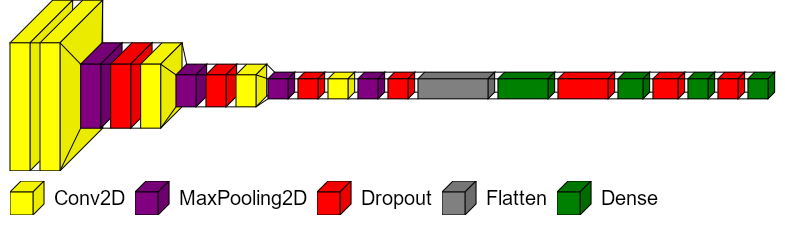

In [9]:
#visualkeras.layered_view(model).show() # display using your system viewer
#visualkeras.layered_view(model, to_file='output.png') # write to disk
#visualkeras.layered_view(model, to_file='output.png').show() # write and show

color_map = defaultdict(dict)
color_map[Conv2D]['fill'] = 'yellow'
color_map[Dropout]['fill'] = 'red'
color_map[MaxPool2D]['fill'] = 'purple'
color_map[Dense]['fill'] = 'green'
color_map[Flatten]['fill'] = 'gray'

font = ImageFont.truetype("arial.ttf", 20) 
visualkeras.layered_view(model, legend=True, font=font,color_map=color_map)  

In [10]:
print("[INFO] evaluating network")
valscores = model.evaluate(valset, valLabels, verbose=0)
predictions = model.predict(valset, batch_size=200)
print("Validation scores are below \n")
print("%s: %.2f%%" % (model.metrics_names[1], valscores[1]*100))


[INFO] evaluating network
Validation scores are below 

accuracy: 86.31%


In [11]:
class_names = ['ABDMJ', 'Agen', 'Allaple', 'Autoit', 'Berbew', 'Bitman', 'Dinwod', 'Dorkbot', 
               'Dridex', 'Emotet', 'Fsysna', 'Hematite', 'InstallMonster', 'Oberal', 'Picsys', 
               'Salgorea', 'Scar', 'Sfone', 'Shifu', 'Socks', 'Sytro', 'Vilsel', 'Vobfus']
print(classification_report(valLabels.argmax(axis=1), predictions.argmax(axis=1), target_names=class_names))


                precision    recall  f1-score   support

         ABDMJ       0.00      0.00      0.00         0
          Agen       0.00      0.00      0.00         0
       Allaple       0.81      0.97      0.88       264
        Autoit       0.00      0.00      0.00         0
        Berbew       0.99      0.71      0.82      4146
        Bitman       0.00      0.00      0.00         0
        Dinwod       0.98      0.96      0.97       911
       Dorkbot       0.56      0.95      0.71       130
        Dridex       0.00      0.00      0.00         0
        Emotet       0.07      0.55      0.13        44
        Fsysna       0.88      0.72      0.79       188
      Hematite       0.94      0.93      0.93       670
InstallMonster       0.00      0.00      0.00         0
        Oberal       0.33      0.97      0.49       101
        Picsys       0.94      0.99      0.97       295
      Salgorea       0.98      0.93      0.95      1235
          Scar       0.16      0.19      0.17  

C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
print(confusion_matrix(predictions.argmax(axis=1), valLabels.argmax(axis=1)))

[[   0    0    0    0    6    0    0    0    0    1    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0    0    0   62    0   19    0    0    2   20   35    0    1
     0   14    1    1    0    0    4    0    8]
 [   0    0  255    0    2    0    0    0    0    0    0    0    0    0
     0    0    0    2    0    0   54    0    0]
 [   0    0    0    0   73    0    0    3    0    0    1    0    0    0
     0    7    8   11    0    0    4    0    0]
 [   0    0    0    0 2924    0    0    3    0    0    1    0    0    0
     0    6    1   17    0    0    3    0    0]
 [   0    0    5    0  360    0    1    0    0   10    0    0    0    0
     0    4    1    1    0    0    2    0    4]
 [   0    0    0    0   11    0  877    0    0    1    0    0    0    0
     0    0    2    0    0    0    0    0    0]
 [   0    0    0    0   96    0    0  124    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    